<a href="https://colab.research.google.com/github/MauroBecker/Projeto-Final-BI-Mauro-Becker/blob/main/AG_e_LF_com_FO_em_Fev_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**APLICAÇÃO DE LOGICA FUZZY E ALGORITMO GENETICO PARA DETERMINAR PERMEABILIDADE A PARTIR DE DESCRIÇÕES PETROGRÁFICAS E MEDIDAS DE POROSIDADE**

INSTALAÇÃO E CARREGAMENTO DE BIBLIOTECAS DE AG E LOGICA FUZZY EM PYTHON

In [88]:
!pip install deap

In [89]:
!pip install scikit-fuzzy

In [90]:
import numpy as np
import pandas as pd
import random
import skfuzzy as fuzz
import skfuzzy.control as ctrl
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import math

IMPORTAÇÃO DADOS E ESTABELECIMENTO DA FUNÇÃO OBJETIVO

In [91]:
# Leitura dos dados do arquivo CSV
df = pd.read_csv('Dados Normalizados Fev01_2025_reduzido 5 linhas.csv')

# Calculando a média das permeabilidades fornecidas
permeabilidades_fornecidas = df['permeabilidade'].tolist()
media_permeabilidade_fornecida = np.mean(permeabilidades_fornecidas)

# Função de aptidão modificada
def fitness(individual):
    media_permeabilidade_estimada = np.mean(aplicar_logica_fuzzy(individual))
    return abs(media_permeabilidade_fornecida - media_permeabilidade_estimada),

DECLARAÇÃO DE FUNÇÕES AUXILIARES E INFORMAÇÕES DA LOGICA FUZZY

In [92]:
# Função de aplicação da lógica fuzzy
def aplicar_logica_fuzzy(cromossomo):
    resultados = []
    for item in cromossomo:
        for nome_variavel, variavel in item.items():
            for posicao in variavel:
                for nome_posicao, pontos in posicao.items():
                    # Configurando o sistema fuzzy com os pontos do cromossomo
                    input_data = {
                        'poco': pontos[0], 'profundidade': pontos[1], 'facies': pontos[2],
                        'porosidade': pontos[3], 'porotipo': pontos[3], 'fraturamento': pontos[3],
                        'poroprimaria': pontos[3], 'dissolucao': pontos[3], 'cimentacao': pontos[3],
                        'substrecrista': pontos[3]
                    }
                    set_input_attributes(engine.input, input_data)
                    engine.compute()
                    resultados.append(engine.output['permeabilidade'])
    return resultados

# Configurando o sistema fuzzy com suas regras e funções de pertinência
# DEFINIÇÕES DOS UNIVERSOS

# antecedentes, 10 variáveis da rocha a serem consideradas
poco = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'poco')
profundidade = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'profundidade')
facies = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'facies')
porosidade = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'porosidade')
porotipo = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'porotipo')
fraturamento = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'fraturamento')
poroprimaria = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'poroprimaria')
dissolucao = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'dissolucao')
cimentacao = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'cimentacao')
substrecrista = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'substrecrista')

# consequente, que será a permeabilidade da rocha
permeabilidade = ctrl.Consequent(np.arange(0, 3.01, 0.01), 'permeabilidade')

In [93]:
# DEFINIÇÕES INICIADORAS DAS FUNÇÕES DE PERTINÊNCIA
# poco
poco['baixo'] = fuzz.trapmf(poco.universe, [0, 0, 1.2, 1.5])
poco['medio'] = fuzz.trapmf(poco.universe, [1.2, 1.5, 1.8, 2.4])
poco['alto'] = fuzz.trapmf(poco.universe, [1.8, 2.4, 3, 3])

# profundidade
profundidade['baixo'] = fuzz.trapmf(profundidade.universe, [0, 0, 0.78, 1.65])
profundidade['medio'] = fuzz.trapmf(profundidade.universe, [1.07, 1.65, 2.22, 2.51])
profundidade['alto'] = fuzz.trapmf(profundidade.universe, [2.22, 2.51, 3, 3])

# facies
facies['baixo'] = fuzz.trapmf(facies.universe, [0, 0, 0.86, 1.21])
facies['medio'] = fuzz.trapmf(facies.universe, [0.86, 1.21, 2.29, 2.64])
facies['alto'] = fuzz.trapmf(facies.universe, [2.29, 2.64, 3, 3])

# porosidade
porosidade['muito baixa'] = fuzz.trapmf(porosidade.universe, [0, 0, 0.31, 0.84])
porosidade['baixa'] = fuzz.trapmf(porosidade.universe, [0.31, 0.84, 1.05, 1.37])
porosidade['mediana'] = fuzz.trapmf(porosidade.universe, [1.05, 1.58, 1.89, 2.10])
porosidade['boa'] = fuzz.trapmf(porosidade.universe, [1.89, 2.10, 2.63, 2.95])
porosidade['muito boa'] = fuzz.trapmf(porosidade.universe, [2.63, 2.95, 3.0, 3.0])

# porotipo
porotipo['baixo'] = fuzz.trapmf(porotipo.universe, [0, 0, 1.12, 1.5])
porotipo['medio'] = fuzz.trapmf(porotipo.universe, [1.12, 1.5, 2.25, 2.65])
porotipo['alto'] = fuzz.trapmf(porotipo.universe, [2.25, 2.65, 3, 3])

# fraturamento
fraturamento['baixo'] = fuzz.trapmf(fraturamento.universe, [0, 0, 1, 1.5])
fraturamento['medio'] = fuzz.trapmf(fraturamento.universe, [1, 1.5, 2, 2.5])
fraturamento['alto'] = fuzz.trapmf(fraturamento.universe, [2, 2.5, 3, 3])

# poroprimaria
poroprimaria['baixo'] = fuzz.trapmf(poroprimaria.universe, [0, 0, 1, 1.5])
poroprimaria['medio'] = fuzz.trapmf(poroprimaria.universe, [1, 1.5, 2, 2.5])
poroprimaria['alto'] = fuzz.trapmf(poroprimaria.universe, [2, 2.5, 3, 3])

# dissolucao
dissolucao['baixo'] = fuzz.trapmf(dissolucao.universe, [0, 0, 1, 1.5])
dissolucao['medio'] = fuzz.trapmf(dissolucao.universe, [1, 1.5, 2, 2.5])
dissolucao['alto'] = fuzz.trapmf(dissolucao.universe, [2, 2.5, 3, 3])

# cimentacao
cimentacao['baixo'] = fuzz.trapmf(cimentacao.universe, [0, 0, 1, 1.5])
cimentacao['medio'] = fuzz.trapmf(cimentacao.universe, [1, 1.5, 2, 2.5])
cimentacao['alto'] = fuzz.trapmf(cimentacao.universe, [2, 2.5, 3, 3])

# substrecrista
substrecrista['baixo'] = fuzz.trapmf(substrecrista.universe, [0, 0, 1, 1.5])
substrecrista['medio'] = fuzz.trapmf(substrecrista.universe, [1, 1.5, 2, 2.5])
substrecrista['alto'] = fuzz.trapmf(substrecrista.universe, [2, 2.5, 3, 3])

# permeabilidade
permeabilidade['muito ruim'] = fuzz.trapmf(permeabilidade.universe, [0, 0, 0.89, 1.07])
permeabilidade['ruim'] = fuzz.trapmf(permeabilidade.universe, [0.89, 1.07, 1.36, 1.44])
permeabilidade['mediana'] = fuzz.trapmf(permeabilidade.universe, [1.36, 1.44, 1.82, 1.91])
permeabilidade['boa'] = fuzz.trapmf(permeabilidade.universe, [1.82, 1.91, 2.29, 2.37])
permeabilidade['muito boa'] = fuzz.trapmf(permeabilidade.universe, [2.29, 2.37, 3, 3])

In [94]:
# Definindo regras fuzzy
regra1 = ctrl.Rule(porosidade['muito baixa'], permeabilidade['muito ruim'])
regra2 = ctrl.Rule(porosidade['baixa'], permeabilidade['ruim'])
regra3 = ctrl.Rule(porosidade['mediana'], permeabilidade['mediana'])
regra4 = ctrl.Rule(porosidade['boa'], permeabilidade['boa'])
regra5 = ctrl.Rule(porosidade['muito boa'], permeabilidade['muito boa'])

regra6 = ctrl.Rule(poco['baixo'] & profundidade['baixo'] & facies['baixo'], permeabilidade['muito boa'])
regra7 = ctrl.Rule(poco['baixo'] & profundidade['medio'] & facies['medio'], permeabilidade['boa'])
regra8 = ctrl.Rule(poco['baixo'] & profundidade['alto'] & facies['alto'], permeabilidade['mediana'])
regra9 = ctrl.Rule(poco['medio'] & profundidade['baixo'] & facies['baixo'], permeabilidade['boa'])
regra10 = ctrl.Rule(poco['medio'] & profundidade['medio'] & facies['medio'], permeabilidade['mediana'])
regra11 = ctrl.Rule(poco['medio'] & profundidade['alto'] & facies['alto'], permeabilidade['ruim'])
# Definindo mais regras fuzzy
regra12 = ctrl.Rule(poco['alto'] & profundidade['baixo'] & facies['baixo'], permeabilidade['mediana'])
regra13 = ctrl.Rule(poco['alto'] & profundidade['medio'] & facies['medio'], permeabilidade['ruim'])
regra14 = ctrl.Rule(poco['alto'] & profundidade['alto'] & facies['alto'], permeabilidade['muito ruim'])

regra15 = ctrl.Rule(dissolucao['baixo'] & cimentacao['baixo'] & substrecrista['baixo'], permeabilidade['mediana'])
regra16 = ctrl.Rule(dissolucao['baixo'] & cimentacao['medio'] & substrecrista['medio'], permeabilidade['ruim'])
regra17 = ctrl.Rule(dissolucao['baixo'] & cimentacao['alto'] & substrecrista['alto'], permeabilidade['muito ruim'])
regra18 = ctrl.Rule(dissolucao['medio'] & cimentacao['baixo'] & substrecrista['baixo'], permeabilidade['boa'])
regra19 = ctrl.Rule(dissolucao['medio'] & cimentacao['medio'] & substrecrista['medio'], permeabilidade['mediana'])
regra20 = ctrl.Rule(dissolucao['medio'] & cimentacao['alto'] & substrecrista['alto'], permeabilidade['ruim'])
regra21 = ctrl.Rule(dissolucao['alto'] & cimentacao['baixo'] & substrecrista['baixo'], permeabilidade['muito boa'])
regra22 = ctrl.Rule(dissolucao['alto'] & cimentacao['medio'] & substrecrista['medio'], permeabilidade['boa'])
regra23 = ctrl.Rule(dissolucao['alto'] & cimentacao['alto'] & substrecrista['alto'], permeabilidade['mediana'])

regra24 = ctrl.Rule(poroprimaria['baixo'] & fraturamento['baixo'] & porotipo['baixo'], permeabilidade['muito ruim'])
regra25 = ctrl.Rule(poroprimaria['baixo'] & fraturamento['medio'] & porotipo['medio'], permeabilidade['ruim'])
regra26 = ctrl.Rule(poroprimaria['baixo'] & fraturamento['alto'] & porotipo['alto'], permeabilidade['mediana'])
regra27 = ctrl.Rule(poroprimaria['medio'] & fraturamento['baixo'] & porotipo['baixo'], permeabilidade['ruim'])
regra28 = ctrl.Rule(poroprimaria['medio'] & fraturamento['medio'] & porotipo['medio'], permeabilidade['mediana'])
regra29 = ctrl.Rule(poroprimaria['medio'] & fraturamento['alto'] & porotipo['alto'], permeabilidade['boa'])
regra30 = ctrl.Rule(poroprimaria['alto'] & fraturamento['baixo'] & porotipo['baixo'], permeabilidade['mediana'])
regra31 = ctrl.Rule(poroprimaria['alto'] & fraturamento['medio'] & porotipo['medio'], permeabilidade['boa'])
regra32 = ctrl.Rule(poroprimaria['alto'] & fraturamento['alto'] & porotipo['alto'], permeabilidade['muito boa'])

# Criando o sistema de controle e simulando
reservatorio_ctrl = ctrl.ControlSystem([
    regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8,
    regra9, regra10, regra11, regra12, regra13, regra14, regra15,
    regra16, regra17, regra18, regra19, regra20, regra21, regra22,
    regra23, regra24, regra25, regra26, regra27, regra28, regra29,
    regra30, regra31, regra32
])
engine = ctrl.ControlSystemSimulation(reservatorio_ctrl)

# Função de aplicação da lógica fuzzy
def aplicar_logica_fuzzy(cromossomo):
    resultados = []
    for item in cromossomo:
        for nome_variavel, variavel in item.items():
            for posicao in variavel:
                for nome_posicao, pontos in posicao.items():
                    # Configurando o sistema fuzzy com os pontos do cromossomo
                    input_data = {
                        'poco': pontos[0], 'profundidade': pontos[1], 'facies': pontos[2],
                        'porosidade': pontos[3], 'porotipo': pontos[3], 'fraturamento': pontos[3],
                        'poroprimaria': pontos[3], 'dissolucao': pontos[3], 'cimentacao': pontos[3],
                        'substrecrista': pontos[3]
                    }
                    set_input_attributes(engine.input, input_data)
                    engine.compute()
                    resultados.append(engine.output['permeabilidade'])
    return resultados

def set_input_attributes(input_dict, input_data):
     for var_name, value in input_data.items():
         input_dict[var_name] = value

ALGORITMO GENÉTICO - DECLARAÇÃO DE PACOTES REFRENTES A BIBLIOTECA DO AG

In [95]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10)  # 10 variáveis de entrada
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fuzzy_evaluation)

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [96]:
# Criação da população inicial
def create_population(size, genome_length):
    # Changed to return a list of dictionaries representing a chromosome structure
    return [gerar_cromossomo(10, 3, 4, 0.0, 3.0) for _ in range(size)]

# Seleção por torneio
def selection(population):
    # Changed to return an individual from the population
    return random.choice(population)

# Crossover (cruzamento)
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]

# Mutação
def mutate(individual, mutation_rate=0.01):
    #mutation is not required
    return individual

In [97]:
# INICIO CODIGO GERAÇÃO DE CROMOSSOMAS

# Geração das soluções pelo AG
def gerar_pontos_ordenados(num_pontos, min_val, max_val, fix_val=None):
    if fix_val is not None:
        pontos = [fix_val] + [round(random.uniform(min_val, max_val), 5) for _ in range(num_pontos - 1)]
        return sorted(pontos)
    else:
        pontos = sorted(round(random.uniform(min_val, max_val), 5) for _ in range(num_pontos))
        return pontos

def gerar_variavel_ordenada(num_posicoes, num_pontos, min_val, max_val, nome_variavel="Variável"):
    variavel = []
    nomes_posicoes = ["baixo", "medio", "alto"]
    for i in range(num_posicoes):
        if i == 0:
            pontos = [0.0] + [
                round(random.uniform(0.0, max_val), 5),
                round(random.uniform(0.0, max_val), 5),
                round(random.uniform(0.0, max_val), 5)
            ]
            pontos = sorted(pontos)
        elif i == 1:
            prev_pos = variavel[i - 1][nomes_posicoes[i - 1]]
            pontos = sorted([
                round(random.uniform(prev_pos[2], prev_pos[3]), 5),  # Ponto 1 (>= ao ponto 3 da posição 1 e <= ao ponto 4 da posição 1)
                round(random.uniform(prev_pos[3], max_val), 5),      # Ponto 2 (>= ao ponto 4 da posição 1 e <= ao ponto 3 da posição 2)
                round(random.uniform(prev_pos[3], max_val), 5),      # Ponto 3 (>= ao ponto 2 da posição 2 e <= ao ponto 1 da posição 3)
                round(random.uniform(prev_pos[3], max_val), 5)       # Ponto 4 (>= ao ponto 3 da posição 2 e <= ao ponto 2 da posição 3)
            ])
        elif i == 2:
            prev_pos = variavel[i - 1][nomes_posicoes[i - 1]]
            pontos = sorted([
                round(random.uniform(prev_pos[2], prev_pos[3]), 5),  # Ponto 1 (>= que o ponto 3 da posição 2 e <= ao ponto 2 da posição 3)
                round(random.uniform(prev_pos[3], max_val), 5),      # Ponto 2 (>= do que o ponto 4 da posição 2 e <= ao ponto 3 da posição 3)
                round(random.uniform(prev_pos[3], max_val), 5),      # Ponto 3 (>= do que o ponto 2 da posição 3 e <= ao ponto 4 da posição 3)
                3.0                                                  # Ponto 4 fixo em 3.0
            ])
        variavel.append({nomes_posicoes[i]: pontos})
    return {nome_variavel: variavel}

def gerar_cromossomo(num_variaveis, num_posicoes, num_pontos, min_val, max_val):
    nomes_variaveis = ["poco", "profundidade", "facies", "porosidade", "porotipo",
                       "fraturamento", "poroprimaria", "dissolucao", "cimentacao", "substrecrista"]

    cromossomo = [gerar_variavel_ordenada(num_posicoes, num_pontos, min_val, max_val, nome_variavel=nomes_variaveis[i]) for i in range(num_variaveis)]
    return cromossomo

# Parâmetros
num_variaveis = 10
num_posicoes = 3
num_pontos = 4
min_val = 0.0
max_val = 3.0

# Gerar cromossomo
cromossomo = gerar_cromossomo(num_variaveis, num_posicoes, num_pontos, min_val, max_val)

# Exibir cromossomo
for item in best_individual:
    for nome_variavel, variavel in item.items():
        print(f"{nome_variavel}:")
        for posicao in variavel:
            for nome_posicao, pontos in posicao.items():
                print(f"  {nome_posicao.capitalize()}: {pontos}")

# Lógica fuzzy aplicada ao cromossomo gerado
def aplicar_logica_fuzzy(cromossomo):
    resultados = []
    for item in cromossomo:
        for nome_variavel, variavel in item.items():
            for posicao in variavel:
                for nome_posicao, pontos in posicao.items():
                    # Configurando o sistema fuzzy com os pontos do cromossomo
                    input_data = {
                        'poco': pontos[0], 'profundidade': pontos[1], 'facies': pontos[2],
                        'porosidade': pontos[3], 'porotipo': pontos[3], 'fraturamento': pontos[3],
                        'poroprimaria': pontos[3], 'dissolucao': pontos[3], 'cimentacao': pontos[3],
                        'substrecrista': pontos[3]
                    }
                    set_input_attributes(engine.input, input_data)
                    engine.compute()
                    resultados.append(engine.output['permeabilidade'])
    return resultados

# Aplicando lógica fuzzy ao cromossomo gerado
resultados = aplicar_logica_fuzzy(cromossomo)
print("Resultados da lógica fuzzy aplicada ao cromossomo gerado:")
print(resultados)

poco:
  Baixo: [0.0, 1.27212, 1.27213, 1.99633]
  Medio: [1.81116, 2.21269, 2.78385, 2.92687]
  Alto: [2.87165, 2.96844, 2.98201, 3.0]
profundidade:
  Baixo: [0.0, 0.32797, 0.6078, 2.48763]
  Medio: [0.79479, 2.5387, 2.66663, 2.71371]
  Alto: [2.69674, 2.86417, 2.94847, 3.0]
facies:
  Baixo: [0.0, 0.22185, 1.16559, 2.80436]
  Medio: [2.6812, 2.87689, 2.92414, 2.97338]
  Alto: [2.92962, 2.97553, 2.99931, 3.0]
porosidade:
  Baixo: [0.0, 0.96935, 1.04559, 2.02497]
  Medio: [1.53437, 2.14686, 2.23348, 2.74533]
  Alto: [2.3282, 2.84211, 2.86968, 3.0]
porotipo:
  Baixo: [0.0, 0.02908, 0.50145, 1.9555]
  Medio: [0.72302, 2.28285, 2.69509, 2.69968]
  Alto: [2.69714, 2.72505, 2.87941, 3.0]
fraturamento:
  Baixo: [0.0, 0.05601, 0.8588, 2.27059]
  Medio: [2.075, 2.39165, 2.39578, 2.89809]
  Alto: [2.64888, 2.94681, 2.98084, 3.0]
poroprimaria:
  Baixo: [0.0, 0.4862, 1.26484, 2.8421]
  Medio: [1.87507, 2.87846, 2.95829, 2.9852]
  Alto: [2.98514, 2.99169, 2.99721, 3.0]
dissolucao:
  Baixo: [0.0, 0.4

In [149]:
# Parâmetros do AG
population_size = 100
genome_length = 10
generations = 5

# Inicialização
population = create_population(population_size, genome_length)

# Evolução
for generation in range(generations):
    next_population = []
    for _ in range(population_size // 2):
        parent1 = selection(population)
        parent2 = selection(population)
        offspring1, offspring2 = crossover(parent1, parent2)
        next_population.extend([mutate(offspring1), mutate(offspring2)])
    population = next_population

# Resultado final
best_individual = min(population, key=fitness)
print(f'Melhor indivíduo: {best_individual} com aptidão {fitness(best_individual)}')

# Aplicando lógica fuzzy ao melhor indivíduo
resultados = aplicar_logica_fuzzy(best_individual)
print("Resultados da lógica fuzzy aplicada ao melhor indivíduo:")
print(resultados)

# Guardando os resultados em um DataFrame
df_resultados = pd.DataFrame(resultados, columns=['Permeabilidade'])
df_resultados.to_csv('resultados_fuzzy.csv', index=False)

print("Resultados salvos em 'resultados_fuzzy.csv'.")


Melhor indivíduo: [{'poco': [{'baixo': [0.0, 2.02607, 2.32552, 2.98933]}, {'medio': [2.35298, 2.9908, 2.99238, 2.99915]}, {'alto': [2.99675, 2.99916, 2.99949, 3.0]}]}, {'profundidade': [{'baixo': [0.0, 1.23922, 1.25435, 2.93073]}, {'medio': [1.9343, 2.94804, 2.95872, 2.9643]}, {'alto': [2.96243, 2.98533, 2.98739, 3.0]}]}, {'facies': [{'baixo': [0.0, 0.31417, 1.48274, 1.8572]}, {'medio': [1.53815, 2.29929, 2.33803, 2.85742]}, {'alto': [2.67265, 2.88007, 2.9399, 3.0]}]}, {'porosidade': [{'baixo': [0.0, 0.2256, 0.57112, 1.5606]}, {'medio': [1.55467, 1.71685, 2.41269, 2.72752]}, {'alto': [2.67188, 2.74406, 2.79562, 3.0]}]}, {'porotipo': [{'baixo': [0.0, 0.69634, 0.9141, 1.79767]}, {'medio': [1.56929, 2.14691, 2.72366, 2.92346]}, {'alto': [2.78214, 2.9337, 2.96883, 3.0]}]}, {'fraturamento': [{'baixo': [0.0, 0.9303, 2.48827, 2.84942]}, {'medio': [2.51894, 2.88631, 2.94367, 2.94427]}, {'alto': [2.94388, 2.97957, 2.99426, 3.0]}]}, {'poroprimaria': [{'baixo': [0.0, 0.21464, 0.30113, 1.69572]}, 

In [150]:
# Exibir cromossomo best individual
for item in best_individual:
    for nome_variavel, variavel in item.items():
        print(f"{nome_variavel}:")
        for posicao in variavel:
            for nome_posicao, pontos in posicao.items():
                print(f"  {nome_posicao.capitalize()}: {pontos}")

poco:
  Baixo: [0.0, 2.02607, 2.32552, 2.98933]
  Medio: [2.35298, 2.9908, 2.99238, 2.99915]
  Alto: [2.99675, 2.99916, 2.99949, 3.0]
profundidade:
  Baixo: [0.0, 1.23922, 1.25435, 2.93073]
  Medio: [1.9343, 2.94804, 2.95872, 2.9643]
  Alto: [2.96243, 2.98533, 2.98739, 3.0]
facies:
  Baixo: [0.0, 0.31417, 1.48274, 1.8572]
  Medio: [1.53815, 2.29929, 2.33803, 2.85742]
  Alto: [2.67265, 2.88007, 2.9399, 3.0]
porosidade:
  Baixo: [0.0, 0.2256, 0.57112, 1.5606]
  Medio: [1.55467, 1.71685, 2.41269, 2.72752]
  Alto: [2.67188, 2.74406, 2.79562, 3.0]
porotipo:
  Baixo: [0.0, 0.69634, 0.9141, 1.79767]
  Medio: [1.56929, 2.14691, 2.72366, 2.92346]
  Alto: [2.78214, 2.9337, 2.96883, 3.0]
fraturamento:
  Baixo: [0.0, 0.9303, 2.48827, 2.84942]
  Medio: [2.51894, 2.88631, 2.94367, 2.94427]
  Alto: [2.94388, 2.97957, 2.99426, 3.0]
poroprimaria:
  Baixo: [0.0, 0.21464, 0.30113, 1.69572]
  Medio: [0.429, 2.03921, 2.48459, 2.9805]
  Alto: [2.70333, 2.98249, 2.99486, 3.0]
dissolucao:
  Baixo: [0.0, 1.730

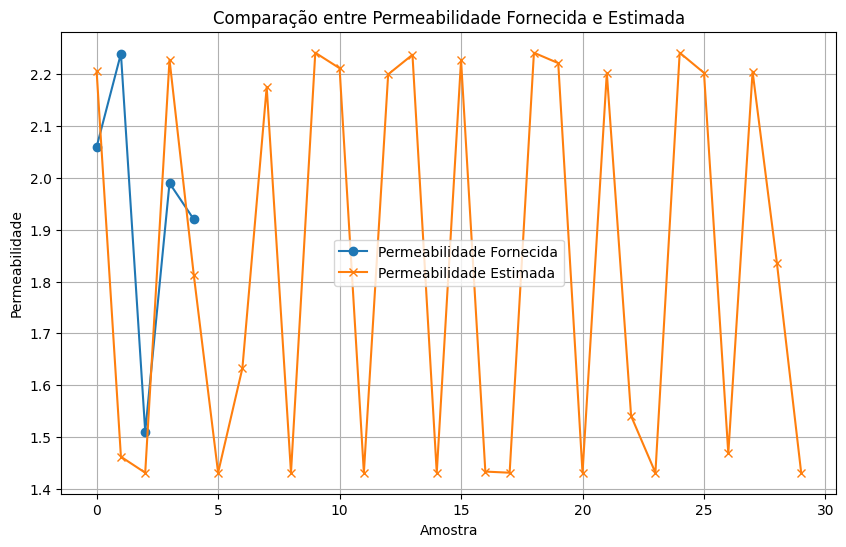

In [151]:
# Plotando os resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(permeabilidades_fornecidas, label='Permeabilidade Fornecida', marker='o')
plt.plot(resultados, label='Permeabilidade Estimada', marker='x')
plt.xlabel('Amostra')
plt.ylabel('Permeabilidade')
plt.title('Comparação entre Permeabilidade Fornecida e Estimada')
plt.legend()
plt.grid(True)
plt.show()

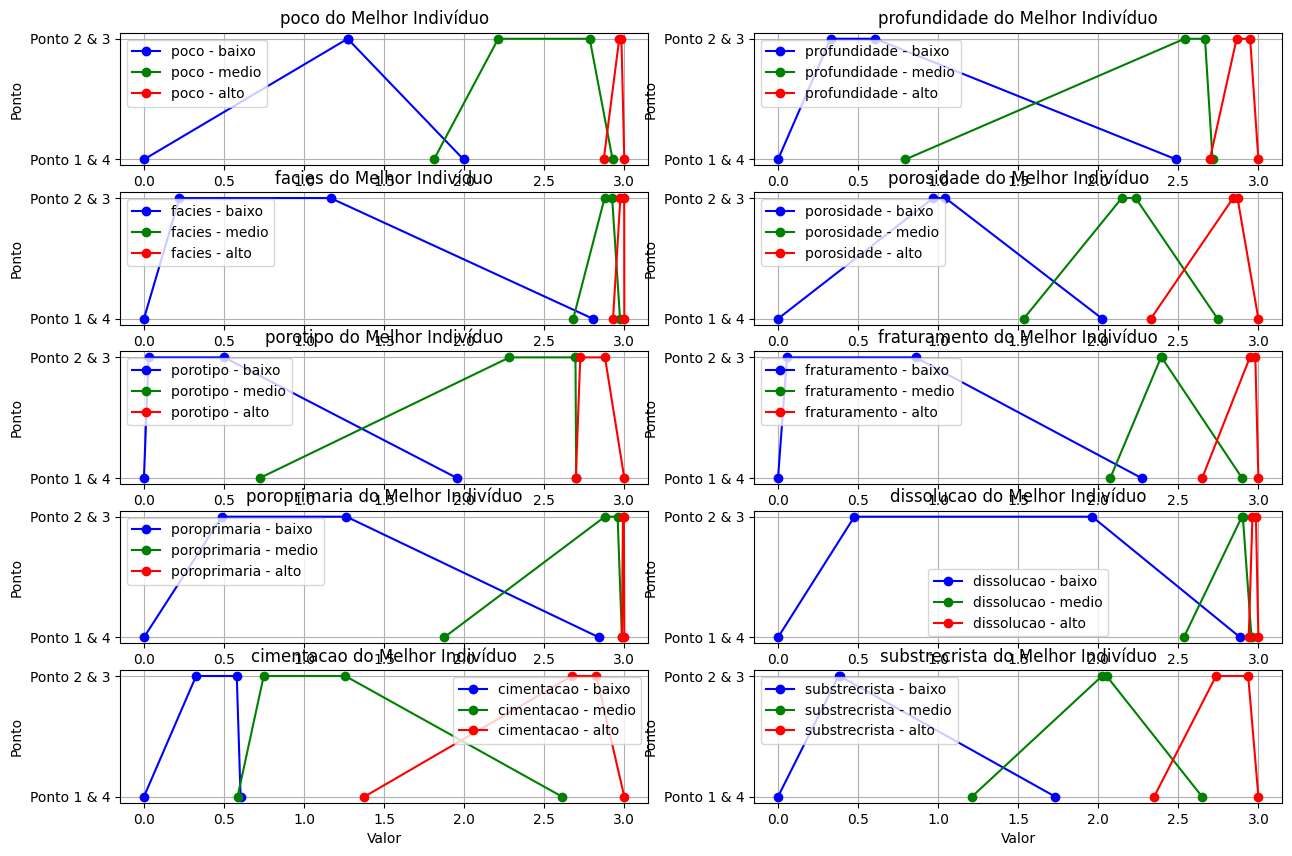

In [148]:
import matplotlib.pyplot as plt

variaveis = ["poco", "profundidade", "facies", "porosidade", "porotipo",
             "fraturamento", "poroprimaria", "dissolucao", "cimentacao", "substrecrista"]

# Dicionário com os valores do cromossomo do melhor indivíduo, NAÕ SEI COMO FAZER PARA O PROGRAMA LER OS PONTOS DO CROMOSSOMA DO MELHOR INDIVIDOU, AQUI PUS NA MAO GRANDE!
melhor_individuo = {
    "poco": {
        "baixo": [0.0, 1.27212, 1.27213, 1.99633],
        "medio": [1.81116, 2.21269, 2.78385, 2.92687],
        "alto": [2.87165, 2.96844, 2.98201, 3.0]
    },
    "profundidade": {
        "baixo": [0.0, 0.32797, 0.6078, 2.48763],
        "medio": [0.79479, 2.5387, 2.66663, 2.71371],
        "alto": [2.69674, 2.86417, 2.94847, 3.0]
    },
    "facies": {
        "baixo": [0.0, 0.22185, 1.16559, 2.80436],
        "medio": [2.6812, 2.87689, 2.92414, 2.97338],
        "alto": [2.92962, 2.97553, 2.99931, 3.0]
    },
    "porosidade": {
        "baixo": [0.0, 0.96935, 1.04559, 2.02497],
        "medio": [1.53437, 2.14686, 2.23348, 2.74533],
        "alto": [2.3282, 2.84211, 2.86968, 3.0]
    },
    "porotipo": {
        "baixo": [0.0, 0.02908, 0.50145, 1.9555],
        "medio": [0.72302, 2.28285, 2.69509, 2.69968],
        "alto": [2.69714, 2.72505, 2.87941, 3.0]
    },
    "fraturamento": {
        "baixo": [0.0, 0.05601, 0.8588, 2.27059],
        "medio": [2.075, 2.39165, 2.39578, 2.89809],
        "alto": [2.64888, 2.94681, 2.98084, 3.0]
    },
    "poroprimaria": {
        "baixo": [0.0, 0.4862, 1.26484, 2.8421],
        "medio": [1.87507, 2.87846, 2.95829, 2.9852],
        "alto": [2.98514, 2.99169, 2.99721, 3.0]
    },
    "dissolucao": {
        "baixo": [0.0, 0.4769, 1.9622, 2.88628],
        "medio": [2.53426, 2.89732, 2.9029, 2.95701],
        "alto": [2.93971, 2.96284, 2.98457, 3.0]
    },
    "cimentacao": {
        "baixo": [0.0, 0.326, 0.57979, 0.60367],
        "medio": [0.58482, 0.74809, 1.25761, 2.6122],
        "alto": [1.3766, 2.67366, 2.826, 3.0]
    },
    "substrecrista": {
        "baixo": [0.0, 0.37813, 0.38432, 1.73141],
        "medio": [1.21067, 2.02378, 2.05198, 2.64864],
        "alto": [2.34888, 2.7357, 2.93632, 3.0]
    }
}

# Plotando os resultados por variável e posição
plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis):
    plt.subplot(5, 2, i + 1)

    # Verificando se a variável está presente no melhor indivíduo
    if var in melhor_individuo:
        variable_data = melhor_individuo[var]  # Acessa os valores para a variável atual

        # Preparando listas para armazenar valores x e y para cada posição da variável
        y_pos = [0, 1, 1, 0]  # Valores fixos para o eixo y
        cores = {'baixo': 'b', 'medio': 'g', 'alto': 'r'}  # Cores para baixo, medio e alto

        for pos_name in ["baixo", "medio", "alto"]:  # Iterando por cada posição
            if pos_name in variable_data:
                x_pos = variable_data[pos_name]  # Extraindo valores da posição atual

                # Conectando os pontos 1 -> 2 -> 3 -> 4
                x_pos_ordenado = [x_pos[0], x_pos[1], x_pos[2], x_pos[3]]

                # Plotando os pontos da variável para cada posição com eixos trocados e conectando os pontos
                plt.plot(x_pos_ordenado, y_pos, marker='o', linestyle='-', color=cores[pos_name], label=f'{var} - {pos_name}')

    plt.ylabel('Ponto')
    plt.xlabel('Valor')
    plt.title(f'{var} do Melhor Indivíduo')
    plt.yticks([0, 1], ["Ponto 1 & 4", "Ponto 2 & 3"])  # Definir rótulos do eixo y
    plt.legend()
    plt.grid(True)
plt.show()


In [153]:
print(melhor_individuo['poco'])

{'baixo': [0.0, 1.27212, 1.27213, 1.99633], 'medio': [1.81116, 2.21269, 2.78385, 2.92687], 'alto': [2.87165, 2.96844, 2.98201, 3.0]}
